# Project 2: Reinforcement Learning  
Author: Harrison Sun (sun.har@northeastern.edu)  
GitHub: https://github.com/harrisonlsun/Reinforcement-Learning-Value-and-Policy-Iteration

## Part 1: Maze Problem

In [231]:
# import libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

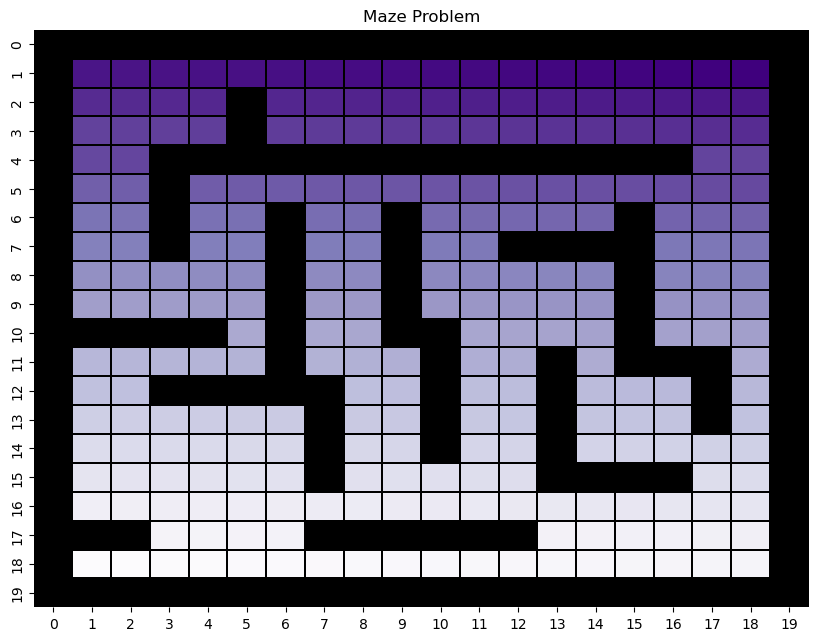

In [232]:
State_Matrix = \
    np.array([[np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN, np.NAN],
              [np.NAN, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, np.NAN],
              [np.NAN, 214, 215, 216, 217,   np.NAN, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, np.NAN],
              [np.NAN, 197, 198, 199, 200,   np.NAN, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, np.NAN],
              [np.NAN, 193, 194,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN, 195, 196, np.NAN],
              [np.NAN, 176, 177,   np.NAN, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, np.NAN],
              [np.NAN, 162, 163,   np.NAN, 164, 165,   np.NAN, 166, 167,   np.NAN, 168, 169, 170, 171, 172,   np.NAN, 173, 174, 175, np.NAN],
              [np.NAN, 151, 152,   np.NAN, 153, 154,   np.NAN, 155, 156,   np.NAN, 157, 158,   np.NAN,   np.NAN,   np.NAN,   np.NAN, 159, 160, 161, np.NAN],
              [np.NAN, 136, 137, 138, 139, 140,   np.NAN, 141, 142,   np.NAN, 143, 144, 145, 146, 147,   np.NAN, 148, 149, 150, np.NAN],
              [np.NAN, 121, 122, 123, 124, 125,   np.NAN, 126, 127,   np.NAN, 128, 129, 130, 131, 132,   np.NAN, 133, 134, 135, np.NAN],
              [np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN, 111,   np.NAN, 112, 113,   np.NAN,   np.NAN, 114, 115, 116, 117,   np.NAN, 118, 119, 120, np.NAN],
              [np.NAN,  99, 100, 101, 102, 103,   np.NAN, 104, 105, 106,   np.NAN, 107, 108,   np.NAN, 109,   np.NAN,   np.NAN,   np.NAN, 110, np.NAN],
              [np.NAN,  89,  90,   np.NAN,   np.NAN,   np.NAN,  np.NAN,   np.NAN,  91,  92,   np.NAN,  93,  94,   np.NAN,  95,  96,  97,   np.NAN,  98, np.NAN],
              [np.NAN,  75,  76,  77,  78,  79,  80,   np.NAN,  81,  82,   np.NAN,  83,  84,   np.NAN,  85,  86,  87,   np.NAN,  88, np.NAN],
              [np.NAN,  60,  61,  62,  63,  64,  65,   np.NAN,  66,  67,   np.NAN,  68,  69,   np.NAN,  70,  71,  72,  73,  74, np.NAN],
              [np.NAN,  47,  48,  49,  50,  51,  52,   np.NAN,  53,  54,  55,  56,  57,   np.NAN,   np.NAN,   np.NAN,   np.NAN,  58,  59, np.NAN],
              [np.NAN,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46, np.NAN],
              [np.NAN,   np.NAN,   np.NAN,  19,  20,  21,  22,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,  23,  24,  25,  26,  27,  28, np.NAN],
              [np.NAN,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18, np.NAN],
              [np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN, np.NAN]])
        

plt.subplots(figsize=(10,7.5))
heatmap = sns.heatmap(State_Matrix, fmt=".2f", linewidths=0.25, linecolor='black',
                      cbar= False, cmap= 'Purples')
heatmap.set_facecolor('black') # Color for the NaN cells in the state matrix
plt.title('Maze Problem')
plt.show()

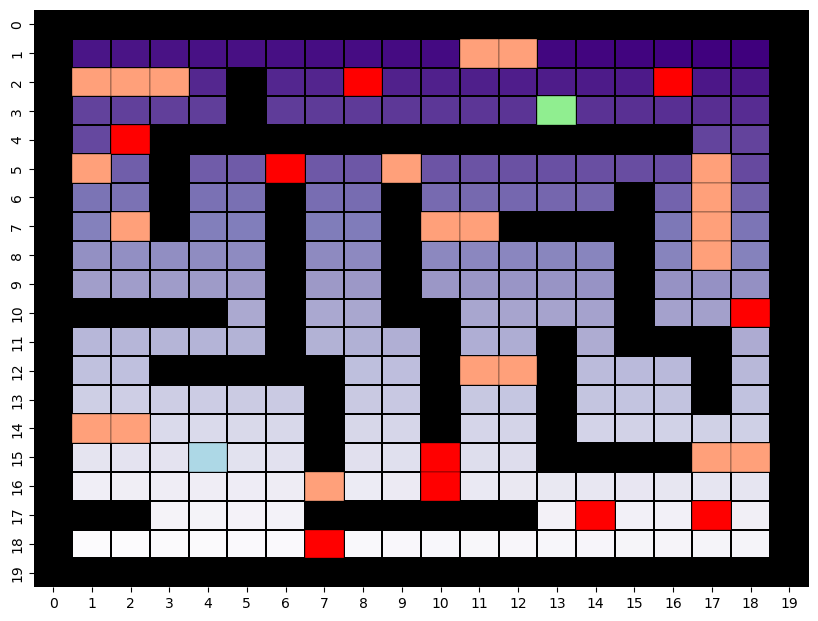

In [233]:
def coloring_blocks(heatmap, oil_states, bump_states, start_state, end_state):
    # Adding red oil blocks
    for i in range(len(oil_states)):
        heatmap.add_patch(Rectangle((oil_states[i][1], oil_states[i][0]), 1, 1,
                                    fill=True, facecolor='red', edgecolor='black', lw=0.25))
    # Adding salmon bump blocks
    for i in range(len(bump_states)):
        heatmap.add_patch(Rectangle((bump_states[i][1], bump_states[i][0]), 1, 1,
                                    fill=True, facecolor='lightsalmon', edgecolor='black', lw=0.25))
    # Adding start block (Blue)
    heatmap.add_patch(Rectangle((start_state[1], start_state[0]), 1, 1,
                                fill=True, facecolor='lightblue', edgecolor='black', lw=0.25))

    # Adding end block (Green)
    heatmap.add_patch(Rectangle((end_state[1], end_state[0]), 1, 1,
                                fill=True, facecolor='lightgreen', edgecolor='black', lw=0.25))

plt.subplots(figsize=(10,7.5))    
heatmap = sns.heatmap(State_Matrix, fmt=".2f", linewidths=0.25, linecolor='black',
                      cbar= False, cmap= 'Purples')
heatmap.set_facecolor('black') # Color for the NaN cells in the state matrix
coloring_blocks(heatmap, oil_states=[(4,2),(5,6), (2,8), (2,16), (10,18), (15,10), (16,10), (18,7), (17,14), (17,17)], bump_states=[(5,1), (7,2), (1,11), (1,12), (2,1), (2,2), (2,3), (5,17), (6,17), (7,17), (8,17), (7,10), (7,11), (5,9), (12,11), (12,12), (15,17), (15,18), (16,7), (14,1), (14,2)], \
                start_state=(15,4),end_state=(3,13))
plt.show()

In [234]:
# Global Variable Definitions
end = +200      # Reward for reaching the end state
oil = -5        # Reward for stepping on an oil block
bump = -10      # Reward for stepping on a bump block
action = -1     # Reward for taking an action (every move)
goal_state = (3,13)

In [235]:
def reward(s):
    if s == (3, 13): # End state
        return action + end
    elif s in [(4,2),(5,6), (2,8), (2,16), (10,18), (15,10), (16,10), (18,7), (17,14), (17,17)]:
        return action + oil
    elif s in [(5,1), (7,2), (1,11), (1,12), (2,1), (2,2), (2,3), (5,17), (6,17), (7,17), (8,17), (7,10), (7,11), (5,9), (12,11), (12,12), (15,17), (15,18), (16,7), (14,1), (14,2)]:
        return action + bump
    else:
        return action

In [236]:
def plot_policy_path(policy, start_state, grid_shape, State_Matrix):
    direction_mapping = {0: 'up', 1: 'down', 2: 'left', 3: 'right'}
    current_state = start_state
    path = []
    
    for _ in range(np.prod(grid_shape)):  # Limit the path length to avoid infinite loops
        action = policy[current_state]
        direction = direction_mapping[action]
        path.append((current_state, direction))
        
        # Determine next state based on the action
        if direction == 'right':
            next_state = (current_state[0], current_state[1] + 1)
        elif direction == 'left':
            next_state = (current_state[0], current_state[1] - 1)
        elif direction == 'up':
            next_state = (current_state[0] - 1, current_state[1])
        elif direction == 'down':
            next_state = (current_state[0] + 1, current_state[1])
        
        # Check if next state is within grid bounds and not a wall
        if 0 <= next_state[0] < grid_shape[0] and 0 <= next_state[1] < grid_shape[1] and not np.isnan(State_Matrix[next_state[0], next_state[1]]):
            current_state = next_state
        else:
            # If next state is a wall or out of bounds, stop moving in that direction
            path.append((current_state, 'stop'))
            break
    
    # Heatmap generation
    plt.subplots(figsize=(10,7.5))    
    heatmap = sns.heatmap(State_Matrix, fmt=".2f", linewidths=0.25, linecolor='black',
                        cbar= False, cmap= 'Purples')
    heatmap.set_facecolor('black')  # Color for the NaN cells in the state matrix

    # coloring_blocks function
    coloring_blocks(heatmap, oil_states=[(4,2),(5,6), (2,8), (2,16), (10,18), (15,10), (16,10), (18,7), (17,14), (17,17)], 
                    bump_states=[(5,1), (7,2), (1,11), (1,12), (2,1), (2,2), (2,3), (5,17), (6,17), (7,17), (8,17), (7,10), (7,11), (5,9), (12,11), (12,12), (15,17), (15,18), (16,7), (14,1), (14,2)], 
                    start_state=(15,4), end_state=(3,13))

    # Plotting the path with arrows
    for state_cr, direction in path:
        r, c = state_cr
        if state_cr == goal_state:
            break
        if direction == 'right':
            plt.arrow(c + 0.5, r + 0.5, 0.8, 0, width=0.04, color='black')
        elif direction == 'left':
            plt.arrow(c + 0.5, r + 0.5, -0.8, 0, width=0.04, color='black')
        elif direction == 'up':
            plt.arrow(c + 0.5, r + 0.5, 0, -0.8, width=0.04, color='black')
        elif direction == 'down':
            plt.arrow(c + 0.5, r + 0.5, 0, 0.8, width=0.04, color='black')

    plt.show()


In [237]:
def draw_values(State_Matrix, policy):
    plt.subplots(figsize=(13,7.5))

    # Create a 2D matrix of zeros with size of 20 x 20 
    State_Matrix_heatmap = np.zeros((20,20), dtype = int) 

    for i in range(19):
        for j in range(19):
            State_Matrix_heatmap[i, j] = int(V[i][j])

    heatmap = sns.heatmap(State_Matrix, fmt="d", annot=State_Matrix_heatmap, linewidths=0.25, linecolor='black',
                          cbar=False, cmap='Purples')

    heatmap.set_facecolor('black') 
    coloring_blocks(heatmap, oil_states=[(4,2),(5,6), (2,8), (2,16), (10,18), (15,10), (16,10), (18,7), (17,14), (17,17)], bump_states=[(5,1), (7,2), (1,11), (1,12), (2,1), (2,2), (2,3), (5,17), (6,17), (7,17), (8,17), (7,10), (7,11), (5,9), (12,11), (12,12), (15,17), (15,18), (16,7), (14,1), (14,2)], \
                    start_state=(15,4),end_state=(3,13))
    plt.show()

In [238]:
def draw_policy(State_Matrix, Values):
    plt.subplots(figsize=(10,7.5))
    heatmap = sns.heatmap(State_Matrix, fmt=".2f", linewidths=0.25, linecolor='black',
                          cbar=False, cmap='Purples')
    heatmap.set_facecolor('black')  # Color for the NaN cells in the state matrix

    # coloring_blocks function
    coloring_blocks(heatmap, oil_states=[(4,2),(5,6), (2,8), (2,16), (10,18), (15,10), (16,10), (18,7), (17,14), (17,17)], bump_states=[(5,1), (7,2), (1,11), (1,12), (2,1), (2,2), (2,3), (5,17), (6,17), (7,17), (8,17), (7,10), (7,11), (5,9), (12,11), (12,12), (15,17), (15,18), (16,7), (14,1), (14,2)], \
                    start_state=(15,4),end_state=(3,13))

    # Plotting the arrows based on the optimal policy
    for i in range(State_Matrix.shape[0]):
        for j in range(State_Matrix.shape[1]):
            if np.isnan(State_Matrix[i, j]):
                continue
            if (i, j) == goal_state:
                continue
            max_adjacent_value = -np.inf
            max_adjacent_direction = None
            for direction in ['up', 'down', 'left', 'right']:
                if direction == 'up':
                    adjacent_value = Values[i-1, j] if i > 0 else Values[i, j]
                elif direction == 'down':
                    adjacent_value = Values[i+1, j] if i < State_Matrix.shape[0]-1 else Values[i, j]
                elif direction == 'left':
                    adjacent_value = Values[i, j-1] if j > 0 else Values[i, j]
                elif direction == 'right':
                    adjacent_value = Values[i, j+1] if j < State_Matrix.shape[1]-1 else Values[i, j]
                if adjacent_value > max_adjacent_value:
                    max_adjacent_value = adjacent_value
                    max_adjacent_direction = direction

            if max_adjacent_direction == 'up':
                plt.arrow(j + 0.5, i + 0.5, 0, -0.4, width=0.04, color='black')
            elif max_adjacent_direction == 'down':
                plt.arrow(j + 0.5, i + 0.5, 0, 0.4, width=0.04, color='black')
            elif max_adjacent_direction == 'left':
                plt.arrow(j + 0.5, i + 0.5, -0.4, 0, width=0.04, color='black')
            elif max_adjacent_direction == 'right':
                plt.arrow(j + 0.5, i + 0.5, 0.4, 0, width=0.04, color='black')

    plt.show()


### 1.1: This portion uses vector-form Policy Iteration to find optimal policy and optimal state values.
a. $p=0.02, \gamma = 0.95, \theta = 0.01$ (Base Scenario)  
b. $p=0.5, \gamma = 0.95, \theta = 0.01$ (Large Stochasticity Scenario)  
c. $p=0.02, \gamma = 0.55, \theta = 0.01$ (Small Discount Factor Scenario)

In [239]:
def vector_form_policy_iteration(State_Matrix, p, gamma, theta):
    V = np.zeros(State_Matrix.shape)
    policy = np.random.randint(0, 4, State_Matrix.shape)
    actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right

    count = 0

    while True:
        count += 1
        # Policy Evaluation
        while True:
            delta = 0
            for i in range(State_Matrix.shape[0]):
                for j in range(State_Matrix.shape[1]):
                    if not np.isnan(State_Matrix[i, j]):
                        v = V[i, j]
                        bellman_sum = 0
                        for action, (a, b) in enumerate(actions):
                            next_i, next_j = i + a, j + b
                            if 0 <= next_i < State_Matrix.shape[0] and 0 <= next_j < State_Matrix.shape[1] and not np.isnan(State_Matrix[next_i, next_j]):
                                prob = p if policy[i, j] == action else (1 - p) / 3
                                bellman_sum += prob * (reward((next_i, next_j)) + gamma * V[next_i, next_j])
                            else:
                                bellman_sum += (p if policy[i, j] == action else (1 - p) / 3) * (reward((i, j)) + gamma * V[i, j])
                        V[i, j] = bellman_sum
                        delta = max(delta, np.abs(v - V[i, j]))
            if delta < theta:
                break

        # Policy Improvement
        policy_stable = True
        for i in range(State_Matrix.shape[0]):
            for j in range(State_Matrix.shape[1]):
                if not np.isnan(State_Matrix[i, j]):
                    old_action = policy[i, j]
                    action_values = []
                    for action, (a, b) in enumerate(actions):
                        next_i, next_j = i + a, j + b
                        if 0 <= next_i < State_Matrix.shape[0] and 0 <= next_j < State_Matrix.shape[1] and not np.isnan(State_Matrix[next_i, next_j]):
                            action_value = p * (reward((next_i, next_j)) + gamma * V[next_i, next_j]) + (1 - p) / 3 * sum(reward((next_i if 0 <= next_i < State_Matrix.shape[0] and 0 <= next_j < State_Matrix.shape[1] else i, next_j if 0 <= next_i < State_Matrix.shape[0] and 0 <= next_j < State_Matrix.shape[1] else j)) + gamma * V[next_i if 0 <= next_i < State_Matrix.shape[0] and 0 <= next_j < State_Matrix.shape[1] else i, next_j if 0 <= next_i < State_Matrix.shape[0] and 0 <= next_j < State_Matrix.shape[1] else j] for other_action in actions if other_action != (a, b))
                        else:
                            action_value = reward((i, j)) + gamma * V[i, j]
                        action_values.append(action_value)
                    policy[i, j] = np.argmax(action_values)
                    if old_action != policy[i, j]:
                        policy_stable = False
        if policy_stable:
            print (f'Policy iteration converged in {count} iterations.')
            return policy, V
        else:
            continue # Not needed, but makes the code more readable


1.1.a. Outputs

Base Scenario, p = 0.02, gamma = 0.95, theta = 0.01
Policy iteration converged in 15 iterations.
Values


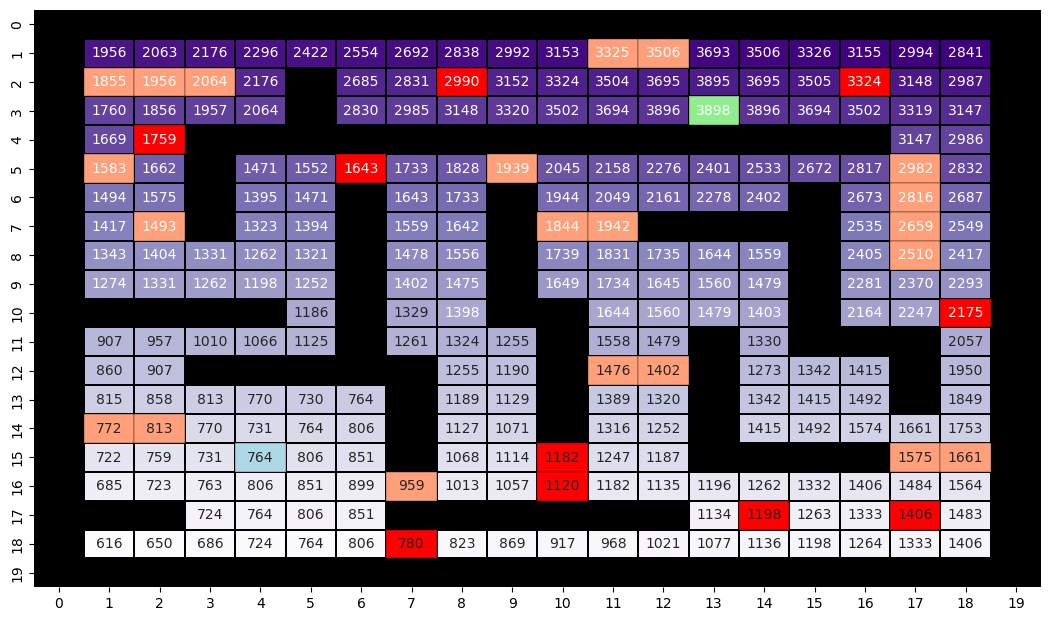

Optimal Policy


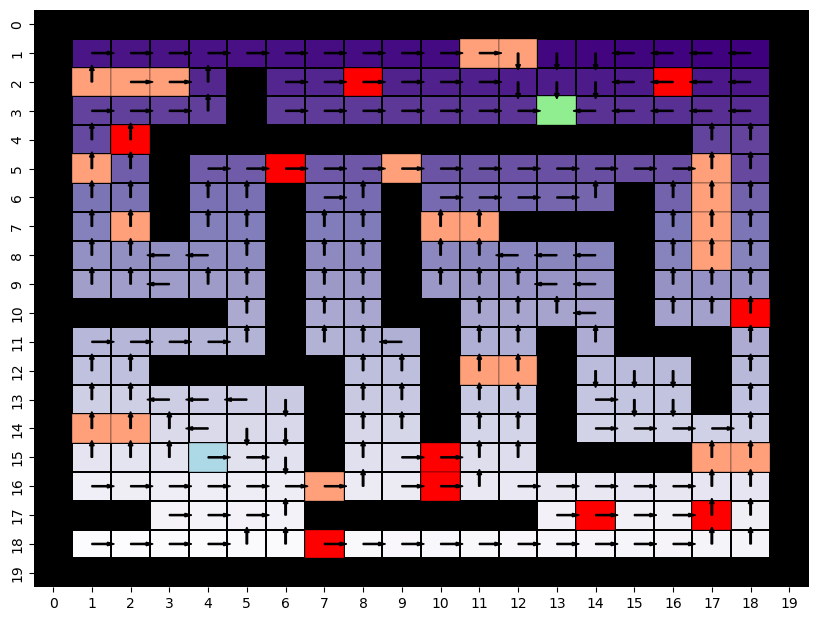

Optimal Path


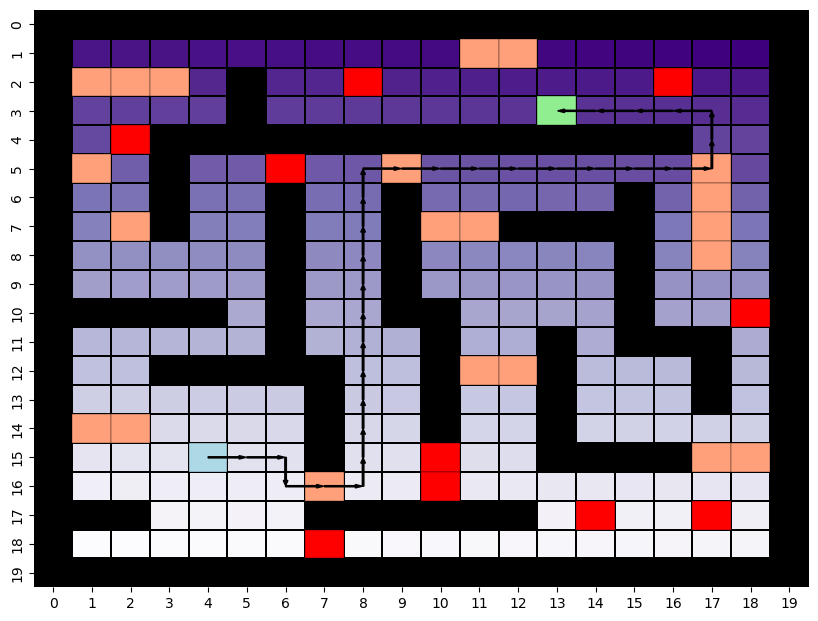

In [240]:
# 1.1 Part A
print("Base Scenario, p = 0.02, gamma = 0.95, theta = 0.01")
policy, V = vector_form_policy_iteration(State_Matrix, 1-0.02, 0.95, 0.01) # Note that the p value is 1 - p due to the way the code is written
print("Values")
draw_values(State_Matrix, policy)
print("Optimal Policy")
draw_policy(State_Matrix, V)
print("Optimal Path")
plot_policy_path(policy, (15, 4), State_Matrix.shape, State_Matrix)

1.1.b. Outputs (Large Stochasticity)

Large Stochasticity, p = 0.5, gamma = 0.95, theta = 0.01
Policy iteration converged in 9 iterations.
Values


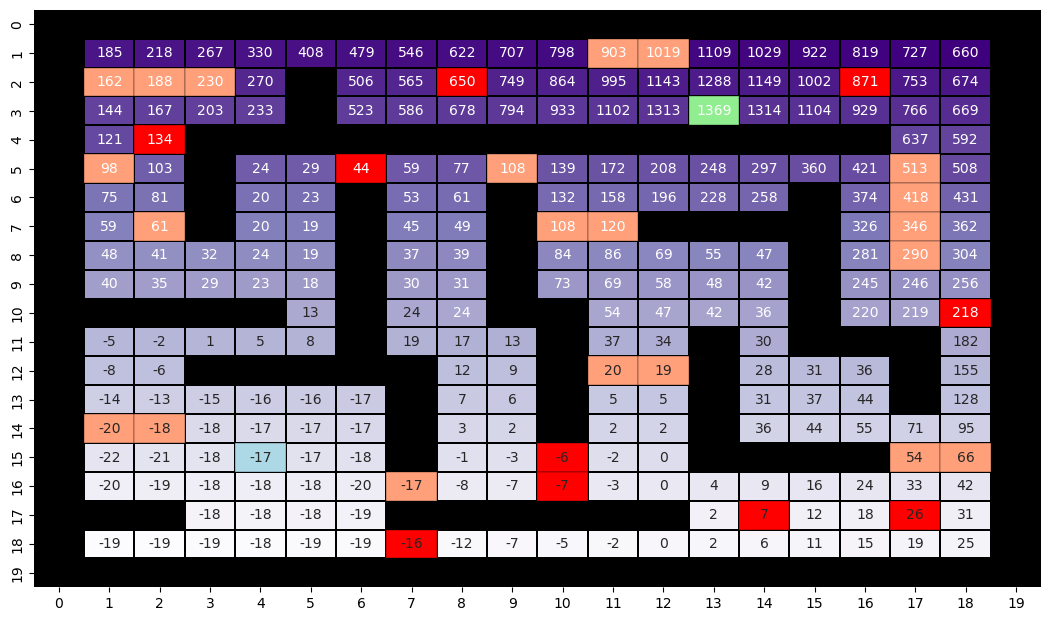

Optimal Policy


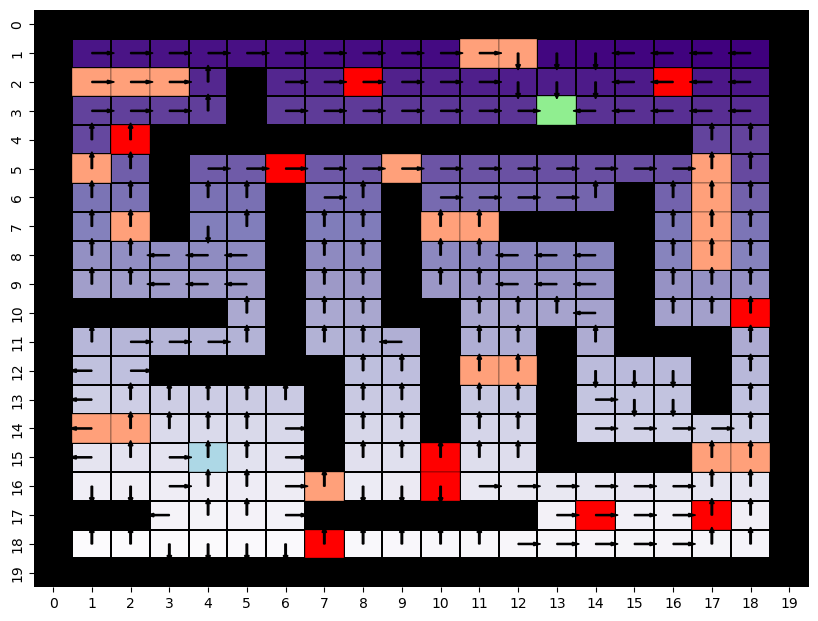

Optimal Path


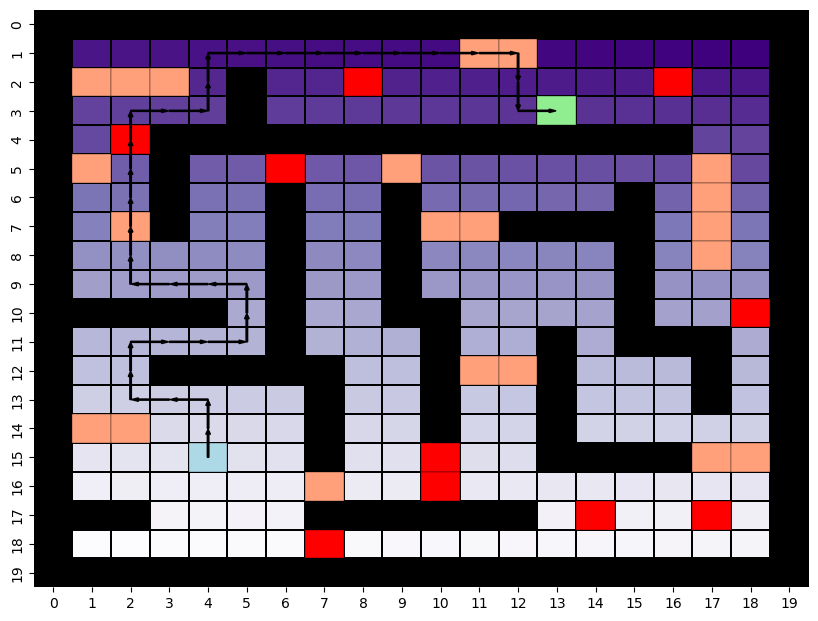

In [241]:
# 1.1 Part B
print("Large Stochasticity, p = 0.5, gamma = 0.95, theta = 0.01")
policy, V = vector_form_policy_iteration(State_Matrix, 1-0.5, 0.95, 0.01) 
print("Values")
draw_values(State_Matrix, policy)
print("Optimal Policy")
draw_policy(State_Matrix, V)
print("Optimal Path")
plot_policy_path(policy, (15, 4), State_Matrix.shape, State_Matrix)

1.1.c. Outputs (Small Discount Factor)

Small Discount Factor, p = 0.02, gamma = 0.55, theta = 0.01
Policy iteration converged in 7 iterations.
Values


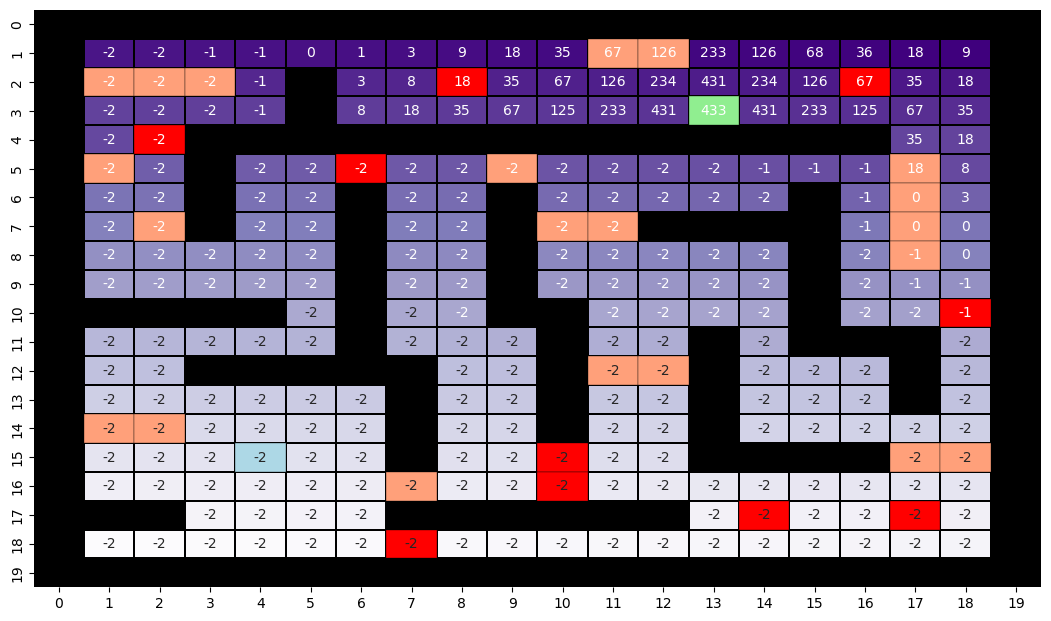

Optimal Policy


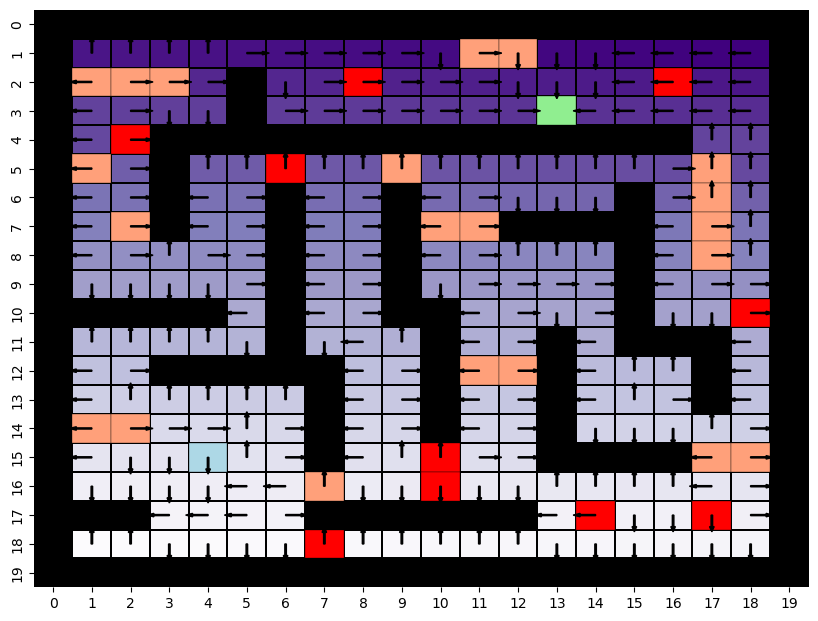

Optimal Path


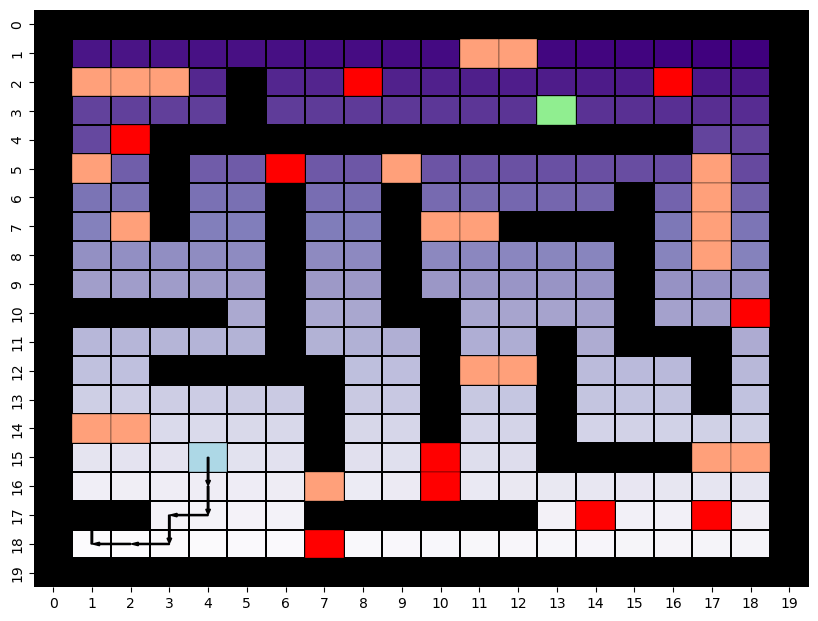

In [242]:
# 1.1 Part C
print("Small Discount Factor, p = 0.02, gamma = 0.55, theta = 0.01")
policy, V = vector_form_policy_iteration(State_Matrix, 1-0.02, 0.55, 0.01) 
print("Values")
draw_values(State_Matrix, policy)
print("Optimal Policy")
draw_policy(State_Matrix, V)
print("Optimal Path")
plot_policy_path(policy, (15, 4), State_Matrix.shape, State_Matrix)

### 1.2: This portion uses vector-form Value Iteration with initial values 0 to find optimal policy and optimal state values.
a. $p=0.02, \gamma = 0.95, \theta = 0.01$ (Base Scenario)  
b. $p=0.5, \gamma = 0.95, \theta = 0.01$ (Large Stochasticity Scenario)  
c. $p=0.02, \gamma = 0.55, \theta = 0.01$ (Small Discount Factor Scenario)

In [243]:
def vector_form_value_iteration(State_Matrix, p, gamma, theta):
    V = np.zeros(State_Matrix.shape)
    actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right

    count = 0
    while True:
        count += 1
        delta = 0
        for i in range(State_Matrix.shape[0]):
            for j in range(State_Matrix.shape[1]):
                if not np.isnan(State_Matrix[i, j]):
                    v = V[i, j]
                    action_values = []
                    for action, (a, b) in enumerate(actions):
                        next_i, next_j = i + a, j + b
                        if 0 <= next_i < State_Matrix.shape[0] and 0 <= next_j < State_Matrix.shape[1] and not np.isnan(State_Matrix[next_i, next_j]):
                            action_value = p * (reward((next_i, next_j)) + gamma * V[next_i, next_j]) + (1 - p) / 3 * sum(reward((next_i if 0 <= next_i < State_Matrix.shape[0] and 0 <= next_j < State_Matrix.shape[1] else i, next_j if 0 <= next_i < State_Matrix.shape[0] and 0 <= next_j < State_Matrix.shape[1] else j)) + gamma * V[next_i if 0 <= next_i < State_Matrix.shape[0] and 0 <= next_j < State_Matrix.shape[1] else i, next_j if 0 <= next_i < State_Matrix.shape[0] and 0 <= next_j < State_Matrix.shape[1] else j] for other_action in actions if other_action != (a, b))
                        else:
                            action_value = reward((i, j)) + gamma * V[i, j]
                        action_values.append(action_value)
                    V[i, j] = max(action_values)
                    delta = max(delta, np.abs(v - V[i, j]))
        if delta < theta:
            print (f'Value iteration converged in {count} iterations.')
            break
    policy = np.zeros(State_Matrix.shape, dtype=int)
    for i in range(State_Matrix.shape[0]):
        for j in range(State_Matrix.shape[1]):
            if not np.isnan(State_Matrix[i, j]):
                action_values = []
                for action, (a, b) in enumerate(actions):
                    next_i, next_j = i + a, j + b
                    if 0 <= next_i < State_Matrix.shape[0] and 0 <= next_j < State_Matrix.shape[1] and not np.isnan(State_Matrix[next_i, next_j]):
                        action_value = p * (reward((next_i, next_j)) + gamma * V[next_i, next_j]) + (1 - p) / 3 * sum(reward((next_i if 0 <= next_i < State_Matrix.shape[0] and 0 <= next_j < State_Matrix.shape[1] else i, next_j if 0 <= next_i < State_Matrix.shape[0] and 0 <= next_j < State_Matrix.shape[1] else j)) + gamma * V[next_i if 0 <= next_i < State_Matrix.shape[0] and 0 <= next_j < State_Matrix.shape[1] else i, next_j if 0 <= next_i < State_Matrix.shape[0] and 0 <= next_j < State_Matrix.shape[1] else j] for other_action in actions if other_action != (a, b))
                    else:
                        action_value = reward((i, j)) + gamma * V[i, j]
                    action_values.append(action_value)
                policy[i, j] = np.argmax(action_values)
    return policy, V

1.2.a. Outputs

Base Scenario, p = 0.02, gamma = 0.95, theta = 0.01
Value iteration converged in 194 iterations.
Values


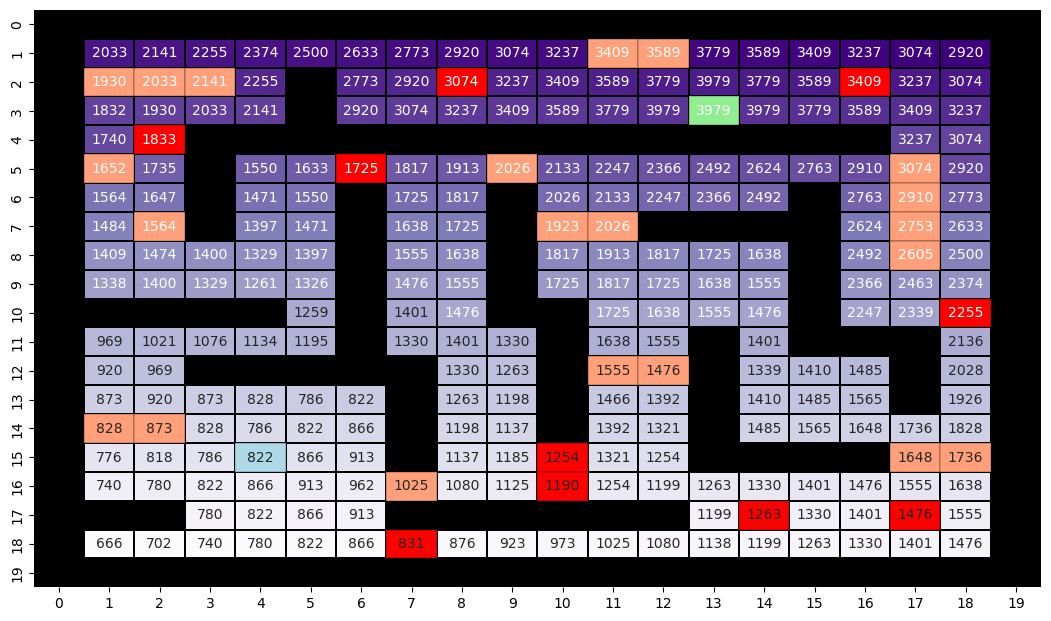

Optimal Policy


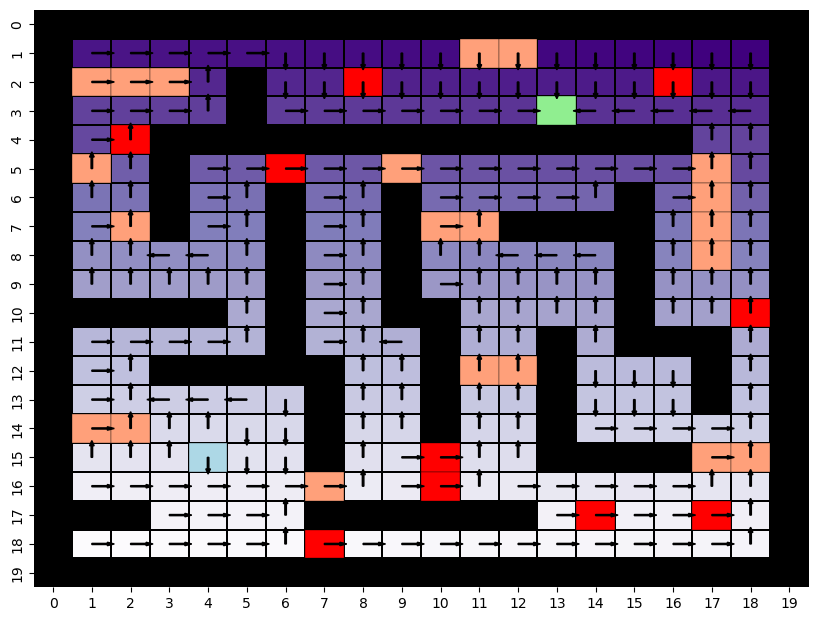

Optimal Path


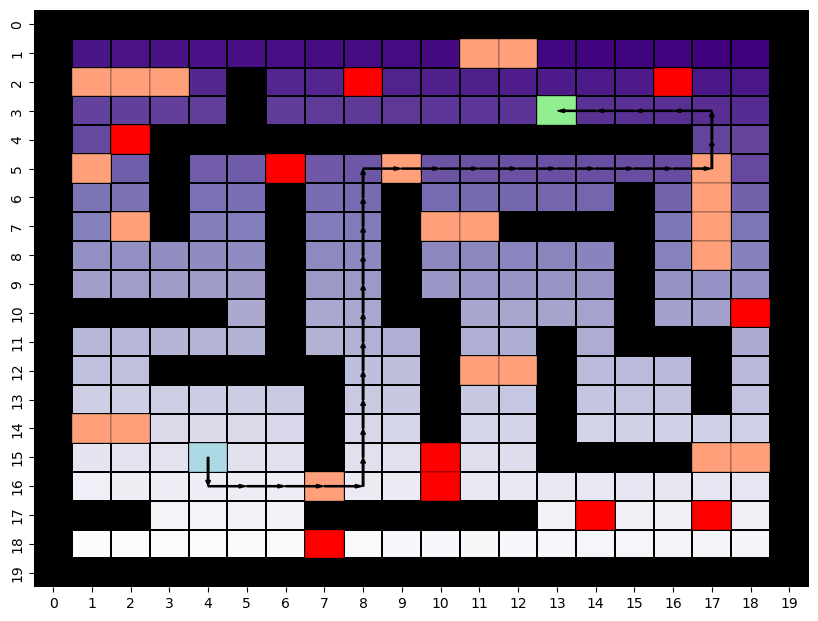

In [244]:
# 1.2 Part A
print("Base Scenario, p = 0.02, gamma = 0.95, theta = 0.01")
policy, V = vector_form_value_iteration(State_Matrix, 1-0.02, 0.95, 0.01)
print("Values")
draw_values(State_Matrix, policy)
print("Optimal Policy")
draw_policy(State_Matrix, V)
print("Optimal Path")
plot_policy_path(policy, (15, 4), State_Matrix.shape, State_Matrix)

1.2.b. Outputs (Large Stochasticity)

Large Stochasticity, p = 0.5, gamma = 0.95, theta = 0.01
Value iteration converged in 194 iterations.
Values


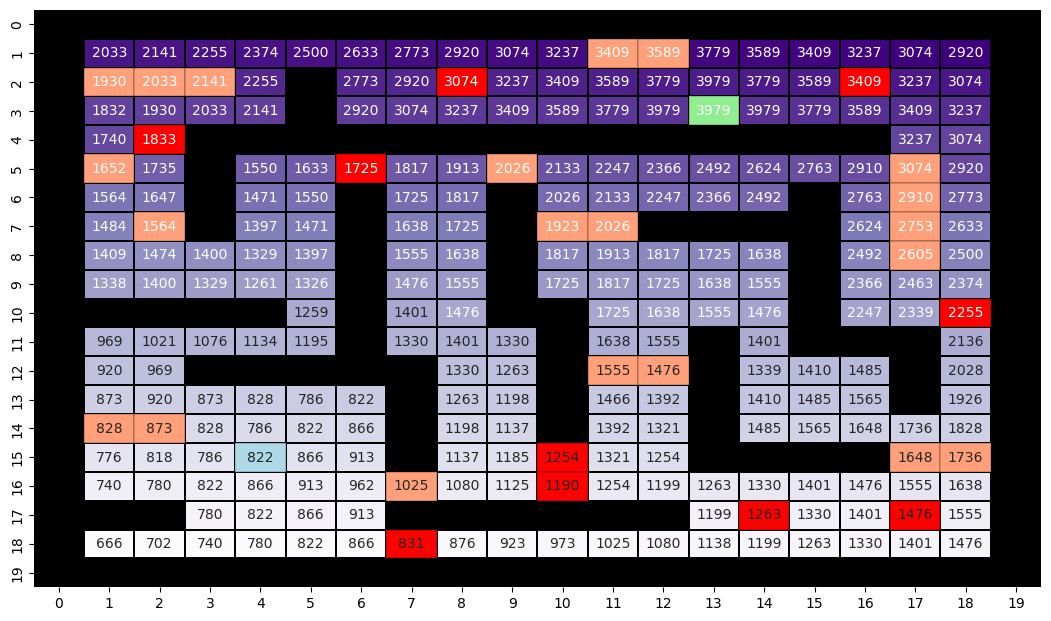

Optimal Policy


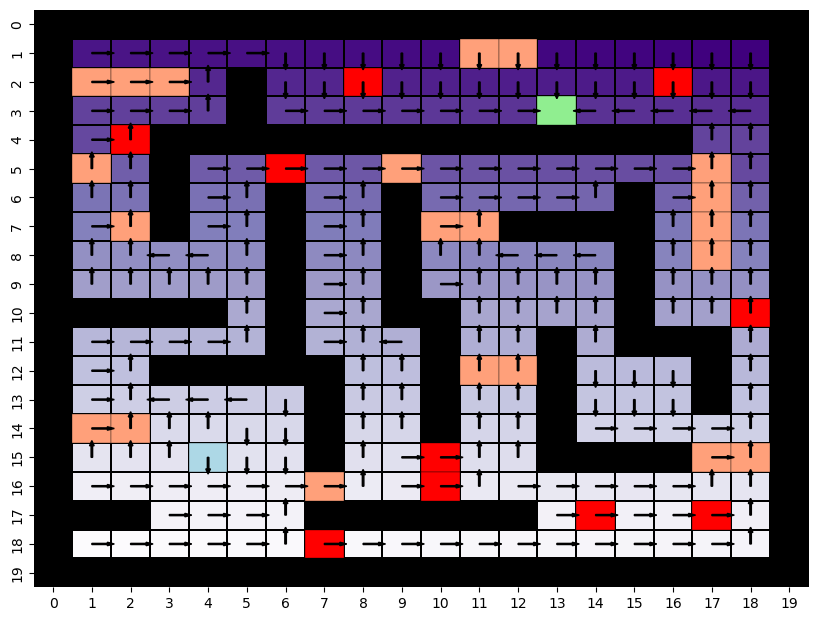

Optimal Path


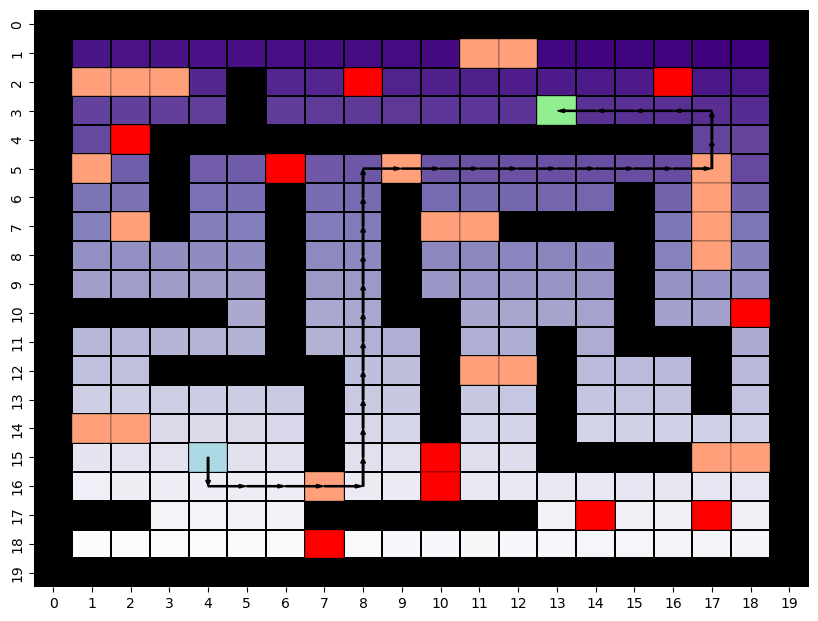

In [245]:
# 1.2 Part B
print("Large Stochasticity, p = 0.5, gamma = 0.95, theta = 0.01")
policy, V = vector_form_value_iteration(State_Matrix, 1-0.5, 0.95, 0.01)
print("Values")
draw_values(State_Matrix, policy)
print("Optimal Policy")
draw_policy(State_Matrix, V)
print("Optimal Path")
plot_policy_path(policy, (15, 4), State_Matrix.shape, State_Matrix)

1.2.c. Outputs (Small Discount Factor)

Small Discount Factor, p = 0.02, gamma = 0.55, theta = 0.01
Value iteration converged in 18 iterations.
Values


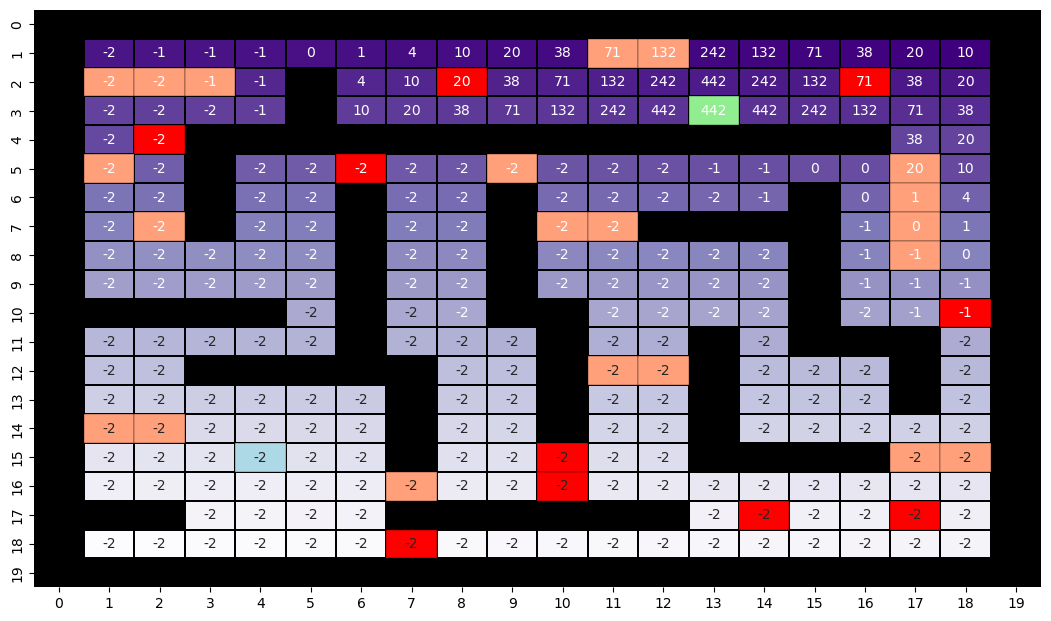

Optimal Policy


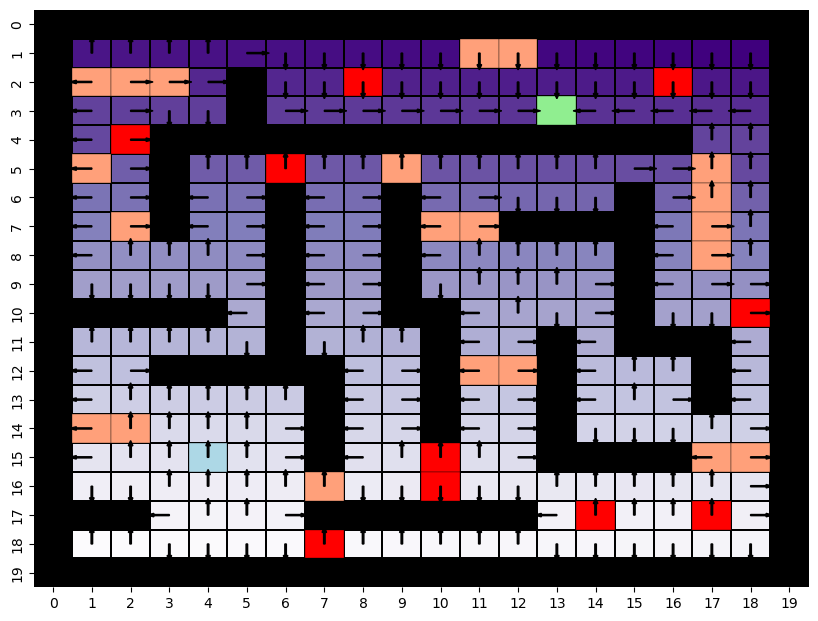

Optimal Path


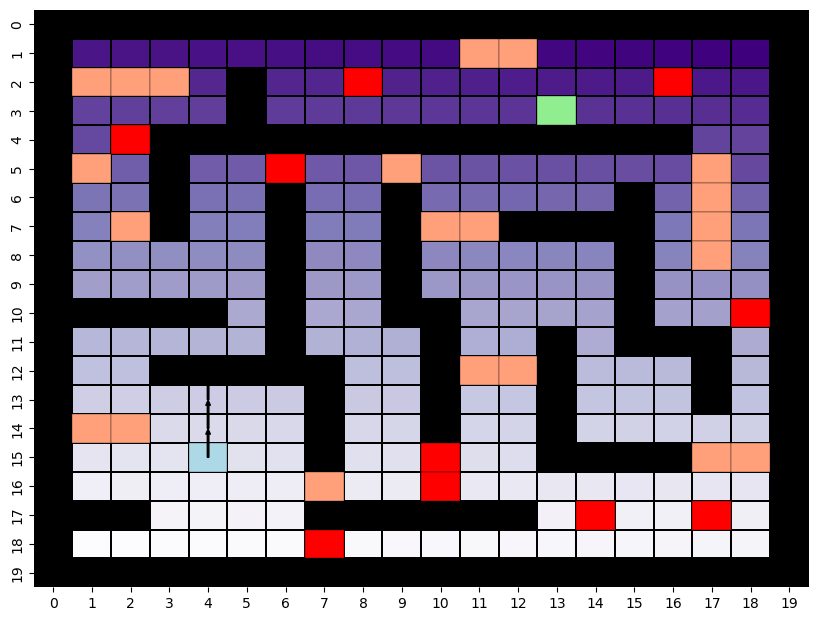

In [246]:
# 1.2 Part C
print("Small Discount Factor, p = 0.02, gamma = 0.55, theta = 0.01")
policy, V = vector_form_value_iteration(State_Matrix, 1-0.02, 0.55, 0.01)
print("Values")
draw_values(State_Matrix, policy)
print("Optimal Policy")
draw_policy(State_Matrix, V)
print("Optimal Path")
plot_policy_path(policy, (15, 4), State_Matrix.shape, State_Matrix)

## Part 2: p53-Mdm2 Negative Feedback Loop Network

In [247]:
def mdm2(p, gamma, theta, a=None):
    # Define the state space
    states = [(a, b, c, d) for a in (0, 1) for b in (0, 1) for c in (0, 1) for d in (0, 1)]

    # Define the action space
    actions = [(0, 0, 0, 0), (1, 0, 0, 0), (0, 1, 0, 0), (0, 0, 1, 0), (0, 0, 0, 1)]

    # Define the transition probability matrix for each action
    def transition_probability(p, current_state, action):
        # Apply action
        next_state = tuple((cs + a) % 2 for cs, a in zip(current_state, action))
        # Apply noise
        return [(1-p)**4 if next_state == s else
                p*(1-p)**3 if sum((ns + s) % 2 for ns, s in zip(next_state, s)) == 1 else
                p**2*(1-p)**2 if sum((ns + s) % 2 for ns, s in zip(next_state, s)) == 2 else
                p**3*(1-p) if sum((ns + s) % 2 for ns, s in zip(next_state, s)) == 3 else
                p**4 if sum((ns + s) % 2 for ns, s in zip(next_state, s)) == 4 else 0
                for s in states]

    # Define the reward function
    def reward(state, action):
        return 5 * sum(state) - sum(abs(a) for a in action)

    # Initialize variables for Value Iteration
    V = {s: 0 for s in states}  # Initial value function
    policy = {s: actions[0] for s in states}  # Initial policy

    # If an initial policy 'a' is provided, update the policy
    if a is not None:
        for s in states:
            policy[s] = a

    delta = 0  # Change in value function
    iterations = 0  # Iteration counter

    # Value Iteration Algorithm
    while True:
        iterations += 1
        delta = 0
        for s in states:
            v = V[s]
            # Compute the expected value for each action
            V[s] = max(sum(tp * (reward(s, a) + gamma * V[sp])
                        for tp, sp in zip(transition_probability(p, s, a), states)) for a in actions)
            # Update the delta
            delta = max(delta, abs(v - V[s]))
        # Check for convergence
        if delta < theta:
            break

    # Update the policy with the optimal action
    for s in states:
        policy[s] = actions[np.argmax([sum(tp * (reward(s, a) + gamma * V[sp])
                                        for tp, sp in zip(transition_probability(p, s, a), states))
                                        for a in actions])]

    # Compute the average activation of genes without control policy
    avg_activation_no_control = np.mean([sum(s) for s in states])

    # Compute the average activation of genes with optimal policy
    avg_activation_with_policy = np.mean([sum(s) * policy[s][0] for s in states])

    print(f'p = {p}, gamma = {gamma}, theta = {theta}')
    print(f'Average activation of genes without control policy: {avg_activation_no_control}')
    print(f'Average activation of genes with optimal policy: {avg_activation_with_policy}')
    print(f'Optimal policy: {policy}')
    print(f'Value function: {V}')
    print(f'Number of iterations: {iterations}')

### Part A: $p = 0.05, \gamma = 0.95, \theta = 0.01$

In [248]:
mdm2(0.05, 0.95, 0.01)

p = 0.05, gamma = 0.95, theta = 0.01
Average activation of genes without control policy: 2.0
Average activation of genes with optimal policy: 0.75
Optimal policy: {(0, 0, 0, 0): (1, 0, 0, 0), (0, 0, 0, 1): (1, 0, 0, 0), (0, 0, 1, 0): (1, 0, 0, 0), (0, 0, 1, 1): (1, 0, 0, 0), (0, 1, 0, 0): (1, 0, 0, 0), (0, 1, 0, 1): (1, 0, 0, 0), (0, 1, 1, 0): (1, 0, 0, 0), (0, 1, 1, 1): (1, 0, 0, 0), (1, 0, 0, 0): (0, 1, 0, 0), (1, 0, 0, 1): (0, 1, 0, 0), (1, 0, 1, 0): (0, 1, 0, 0), (1, 0, 1, 1): (0, 1, 0, 0), (1, 1, 0, 0): (0, 0, 1, 0), (1, 1, 0, 1): (0, 0, 1, 0), (1, 1, 1, 0): (0, 0, 0, 1), (1, 1, 1, 1): (0, 0, 0, 0)}
Value function: {(0, 0, 0, 0): 327.67630382561464, (0, 0, 0, 1): 344.6990443129289, (0, 0, 1, 0): 344.69937108537806, (0, 0, 1, 1): 358.9775469536477, (0, 1, 0, 0): 344.6997526673912, (0, 1, 0, 1): 358.9779276892313, (0, 1, 1, 0): 358.97828650939374, (0, 1, 1, 1): 369.7076274373153, (1, 0, 0, 0): 344.7001985601609, (1, 0, 0, 1): 358.9783725903231, (1, 0, 1, 0): 358.9787304891667, (1, 0

### Part B: $p = 0.2, \gamma = 0.95, \theta = 0.01$ and $p = 0.45, \gamma = 0.95, \theta = 0.01$

In [249]:
mdm2(0.2, 0.95, 0.01)
print("\n")
mdm2(0.45, 0.95, 0.01)

p = 0.2, gamma = 0.95, theta = 0.01
Average activation of genes without control policy: 2.0
Average activation of genes with optimal policy: 0.75
Optimal policy: {(0, 0, 0, 0): (1, 0, 0, 0), (0, 0, 0, 1): (1, 0, 0, 0), (0, 0, 1, 0): (1, 0, 0, 0), (0, 0, 1, 1): (1, 0, 0, 0), (0, 1, 0, 0): (1, 0, 0, 0), (0, 1, 0, 1): (1, 0, 0, 0), (0, 1, 1, 0): (1, 0, 0, 0), (0, 1, 1, 1): (1, 0, 0, 0), (1, 0, 0, 0): (0, 1, 0, 0), (1, 0, 0, 1): (0, 1, 0, 0), (1, 0, 1, 0): (0, 1, 0, 0), (1, 0, 1, 1): (0, 1, 0, 0), (1, 1, 0, 0): (0, 0, 1, 0), (1, 1, 0, 1): (0, 0, 1, 0), (1, 1, 1, 0): (0, 0, 0, 1), (1, 1, 1, 1): (0, 0, 0, 0)}
Value function: {(0, 0, 0, 0): 258.1982566881908, (0, 0, 0, 1): 268.8784941262556, (0, 0, 1, 0): 268.8788834307145, (0, 0, 1, 1): 279.15226753879574, (0, 1, 0, 0): 268.87957712332707, (0, 1, 0, 1): 279.1529573228464, (0, 1, 1, 0): 279.1534600041287, (0, 1, 1, 1): 288.5789045587244, (1, 0, 0, 0): 268.880967328536, (1, 0, 0, 1): 279.154339547584, (1, 0, 1, 0): 279.1548376116446, (1, 0, 1,

### Part C: $p = 0.05, \gamma = 0.95, \theta = 0.01$ and $a(s) = a^1 \:\forall\: s \in S$ where $a^1 \coloneqq [0,0,0,0]^\top$

In [251]:
mdm2(0.05, 0.95, 0.01, a=(0, 0, 0, 0))

p = 0.05, gamma = 0.95, theta = 0.01
Average activation of genes without control policy: 2.0
Average activation of genes with optimal policy: 0.75
Optimal policy: {(0, 0, 0, 0): (1, 0, 0, 0), (0, 0, 0, 1): (1, 0, 0, 0), (0, 0, 1, 0): (1, 0, 0, 0), (0, 0, 1, 1): (1, 0, 0, 0), (0, 1, 0, 0): (1, 0, 0, 0), (0, 1, 0, 1): (1, 0, 0, 0), (0, 1, 1, 0): (1, 0, 0, 0), (0, 1, 1, 1): (1, 0, 0, 0), (1, 0, 0, 0): (0, 1, 0, 0), (1, 0, 0, 1): (0, 1, 0, 0), (1, 0, 1, 0): (0, 1, 0, 0), (1, 0, 1, 1): (0, 1, 0, 0), (1, 1, 0, 0): (0, 0, 1, 0), (1, 1, 0, 1): (0, 0, 1, 0), (1, 1, 1, 0): (0, 0, 0, 1), (1, 1, 1, 1): (0, 0, 0, 0)}
Value function: {(0, 0, 0, 0): 327.67630382561464, (0, 0, 0, 1): 344.6990443129289, (0, 0, 1, 0): 344.69937108537806, (0, 0, 1, 1): 358.9775469536477, (0, 1, 0, 0): 344.6997526673912, (0, 1, 0, 1): 358.9779276892313, (0, 1, 1, 0): 358.97828650939374, (0, 1, 1, 1): 369.7076274373153, (1, 0, 0, 0): 344.7001985601609, (1, 0, 0, 1): 358.9783725903231, (1, 0, 1, 0): 358.9787304891667, (1, 0